Using tutorial:
    https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34

In [47]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
from random import randint
import pandas as pd
import pickle


#Plotting
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#Visualizing pictures
from skimage import io
from skimage import exposure
import skimage.color as color
import math

In [2]:
#path = '/Users/dianaaguilar/Documents/GitHub/frogFun/sampleImages/AllProcessed/'
#path = '/Users/dianaaguilar/Documents/GitHub/frogFun/ProcessedImages/Grayscale/'
path = '/Users/dianaaguilar/Documents/GitHub/frogFun/ProcessedImages/BinaryGlare/'
# change the working directory to the path where the images are located
os.chdir(path)


In [3]:
# this list holds all the image filename
frogs = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            frogs.append(file.name)

In [4]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

2022-03-07 15:47:49.345176: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
def plotGroup(i,name,groups):
    group=groups[i]
    n_frogs=len(group)
    fig, axs = plt.subplots(math.ceil(n_frogs/3), 3)
    fig.set_size_inches(18.5, n_frogs)

    n=0
    y=0
    for frog in group:
        if y==3:
            y= 0
            n+=1 
        image = io.imread(path+frog, pilmode='RGBA')
        gamma2=exposure.adjust_log(image)
        gamma3=exposure.adjust_log(gamma2)
        ranita0 = color.rgba2rgb(gamma3) 
        ranita = color.rgb2gray(ranita0) 
    
        axs[n,y].imshow(image,aspect='auto')
        y+=1
    plt.savefig("../../outputFiles/group_"+name+str(i)+".png")
    #plt.savefig("../../outputFiles/group_grayscale"+str(i)+".png")
    #plt.savefig("../../outputFiles/group_binaryk5"+str(i)+".png")

In [7]:
data = {}
#p = '/Users/dianaaguilar/Documents/GitHub/frogFun/outputFiles/frogs.pkl'
#p = '/Users/dianaaguilar/Documents/GitHub/frogFun/outputFiles/frogsgrayscale.pkl'
#p = '/Users/dianaaguilar/Documents/GitHub/frogFun/outputFiles/frogsbinary.pkl'
p = '/Users/dianaaguilar/Documents/GitHub/frogFun/outputFiles/frogsbinaryGlare.pkl'
# lop through each image in the dataset
for frog in frogs:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(frog,model)
        data[frog] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          

In [8]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

In [10]:
# get a list of just the features
feat = np.array(list(data.values()))
#Reshape
feat = feat.reshape(-1,4096)
#feat.shape

In [11]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [12]:
np.shape(x[0:2])

(2, 100)

In [34]:
x[0,2]

9.107093

In [42]:
txt.split("_binary_glare.png")[0]

'CMR13'

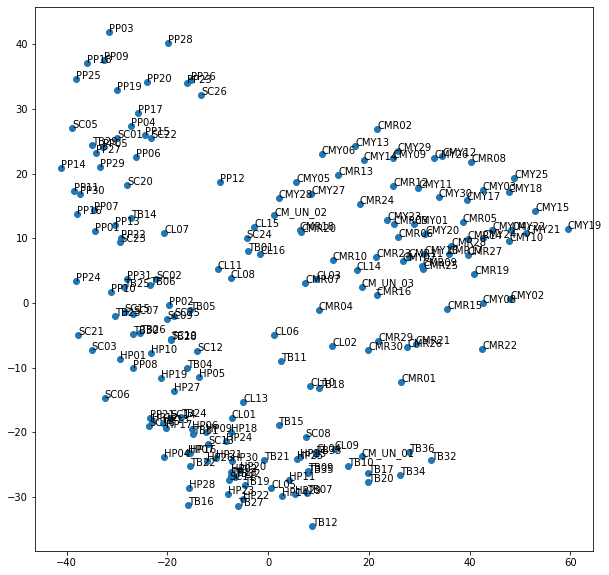

In [46]:
#Plot PCA
fig, axs = plt.subplots()
fig.set_size_inches(10, 10)
plt.scatter(x[:,0],x[:,1])
for i, txt in enumerate(filenames):
    plt.annotate(txt.split("_binary_glare.png")[0], (x[i,0],x[i,1]))

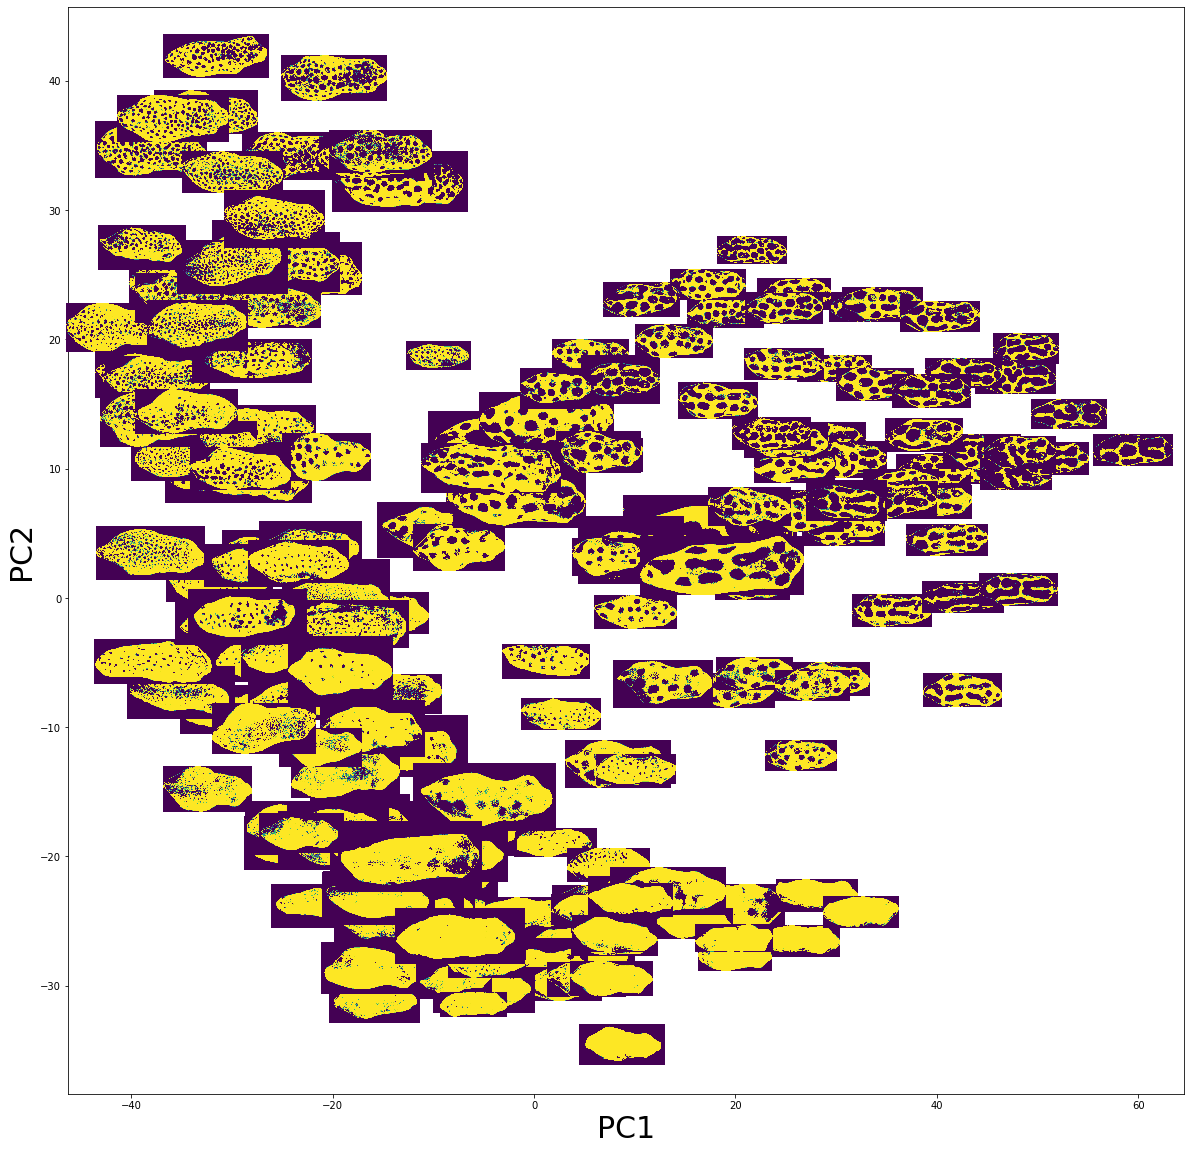

In [63]:
#Plot PCA
def getImage(path, zoom=.2):
    return OffsetImage(plt.imread(path), zoom=zoom)


fig, axs = plt.subplots()
fig.set_size_inches(20, 20)
axs.scatter(x[:,0],x[:,1])
for i, txt in enumerate(filenames):
    ab = AnnotationBbox(getImage(txt),(x[i,0],x[i,1]), frameon=False)
    axs.add_artist(ab)

plt.ylabel("PC2",size=30)
plt.xlabel("PC1",size=30)
    
plt.savefig("PCA_Vgg16_binaryglare.png")

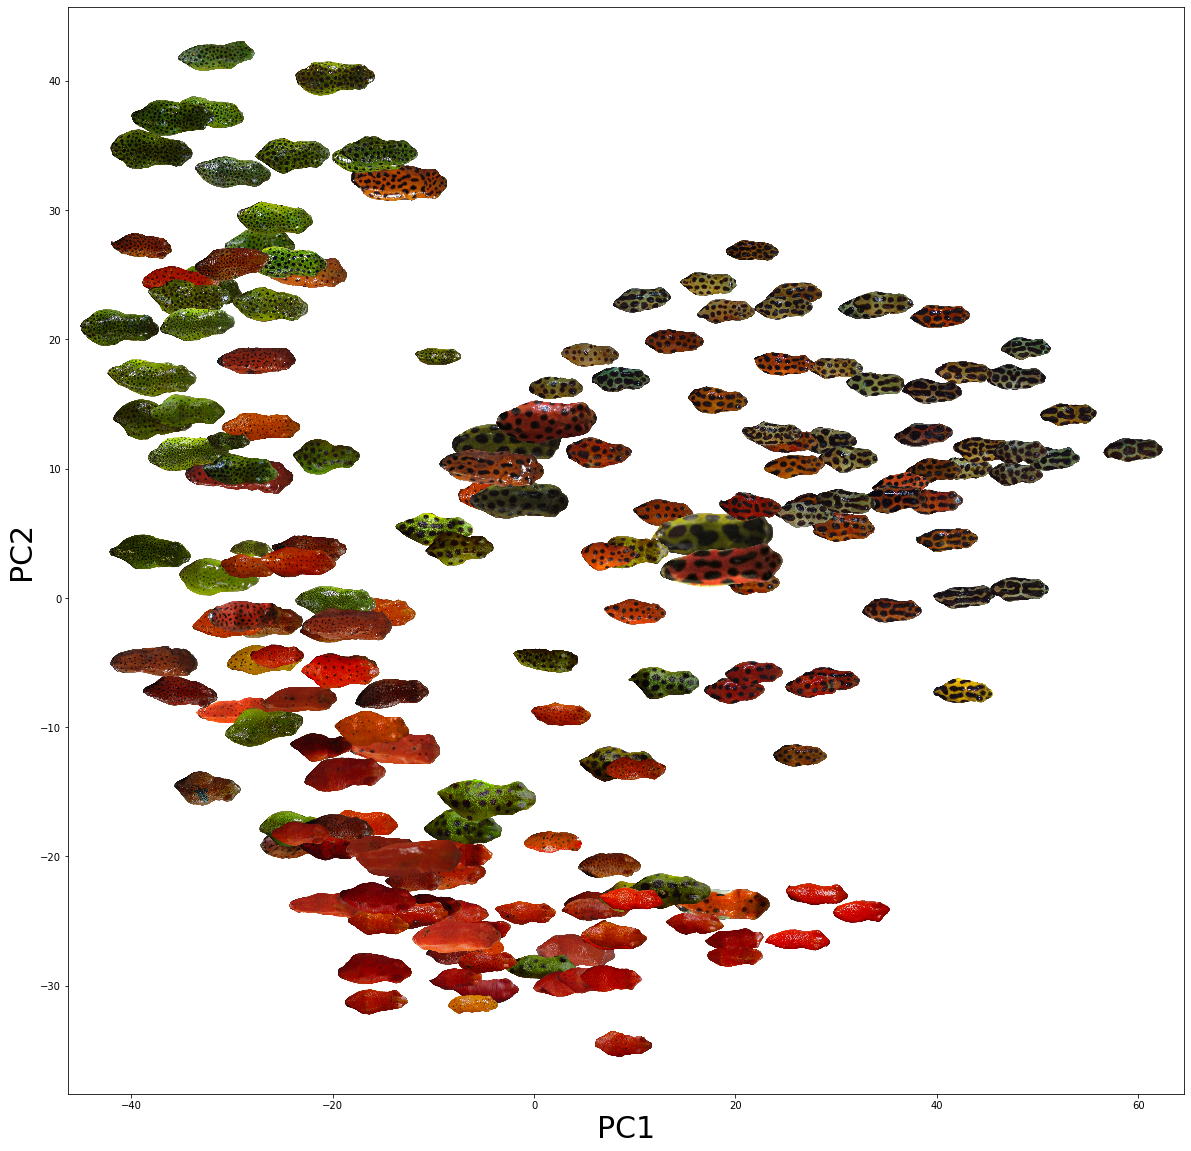

In [65]:
#Plot PCA
def getImage(path, zoom=.15):
    return OffsetImage(plt.imread(path), zoom=zoom)

pathImage='/Users/dianaaguilar/Documents/GitHub/frogFun/sampleImages/AllProcessed/'
fig, axs = plt.subplots()
fig.set_size_inches(20, 20)
axs.scatter(x[:,0],x[:,1])
for i, txt in enumerate(filenames):
    image=pathImage+txt.split("_binary_glare.png")[0]+"-PD.png"
    ab = AnnotationBbox(getImage(image),(x[i,0],x[i,1]), frameon=False)
    axs.add_artist(ab)

plt.ylabel("PC2",size=30)
plt.xlabel("PC1",size=30)
    
plt.savefig("PCA_Vgg16binaryglare_originalImages.png")

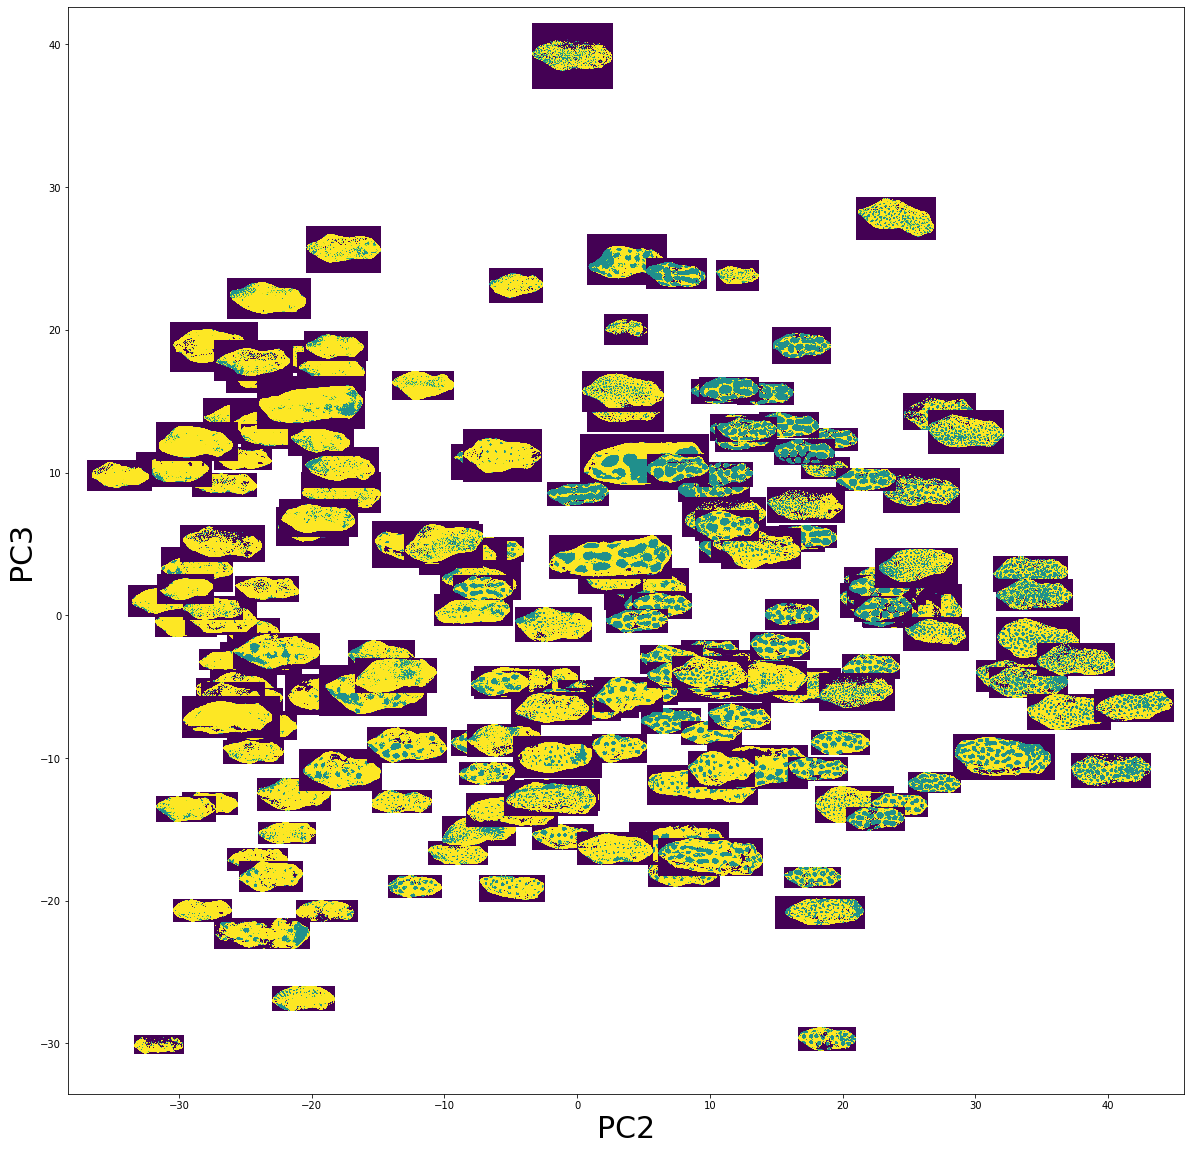

In [75]:
#Plot PCA
def getImage(path, zoom=.15):
    return OffsetImage(plt.imread(path), zoom=zoom)

pc0=2
pc1=3

pathImage='/Users/dianaaguilar/Documents/GitHub/frogFun/ProcessedImages/Binary/'
fig, axs = plt.subplots()
fig.set_size_inches(20, 20)

axs.scatter(x[:,pc0-1],x[:,pc1-1])
for i, txt in enumerate(filenames):
    image=pathImage+txt.split("_binary_glare.png")[0]+"_binary.png"
    ab = AnnotationBbox(getImage(image),(x[i,pc0-1],x[i,pc1-1]), frameon=False)
    axs.add_artist(ab)

plt.xlabel("PC"+str(pc0),size=30)
plt.ylabel("PC"+str(pc1),size=30)

    
plt.savefig("PCA"+str(pc0)+str(pc1)+"_Vgg16binaryglare_binary.png")

In [77]:
remove1st=x[:,2:50]

In [78]:
kmeans = KMeans(n_clusters=6, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=6, random_state=22)

In [79]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [80]:
group=groups[0]

n_frogs=len(group)
n_frogs

path+group[0]

'/Users/dianaaguilar/Documents/GitHub/frogFun/ProcessedImages/BinaryGlare/SC16_binary_glare.png'

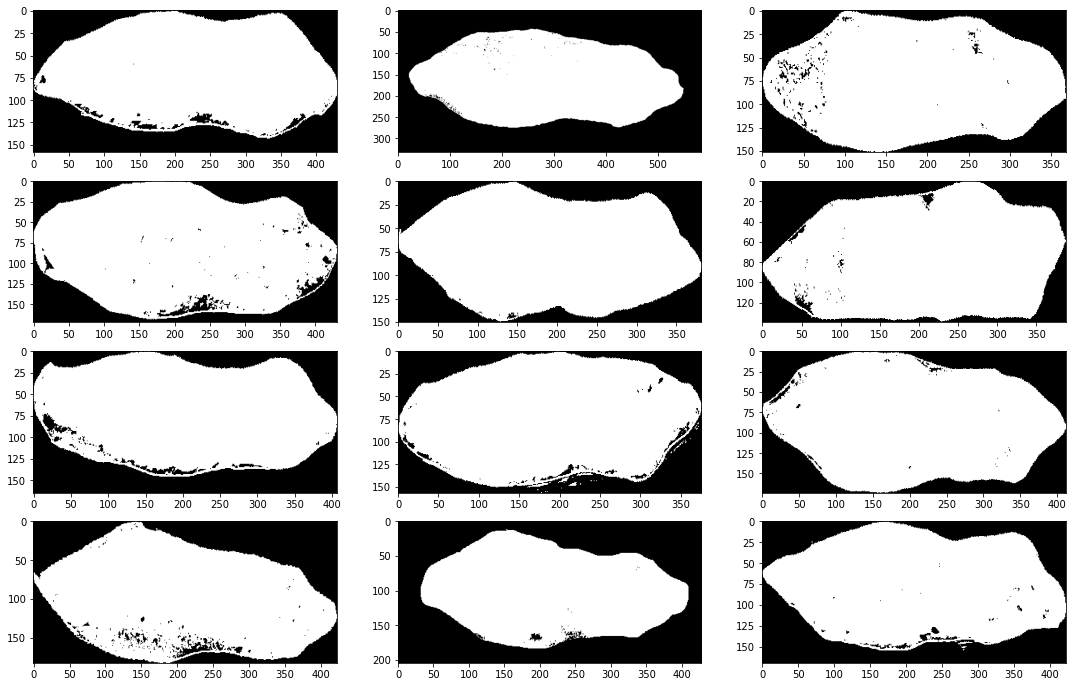

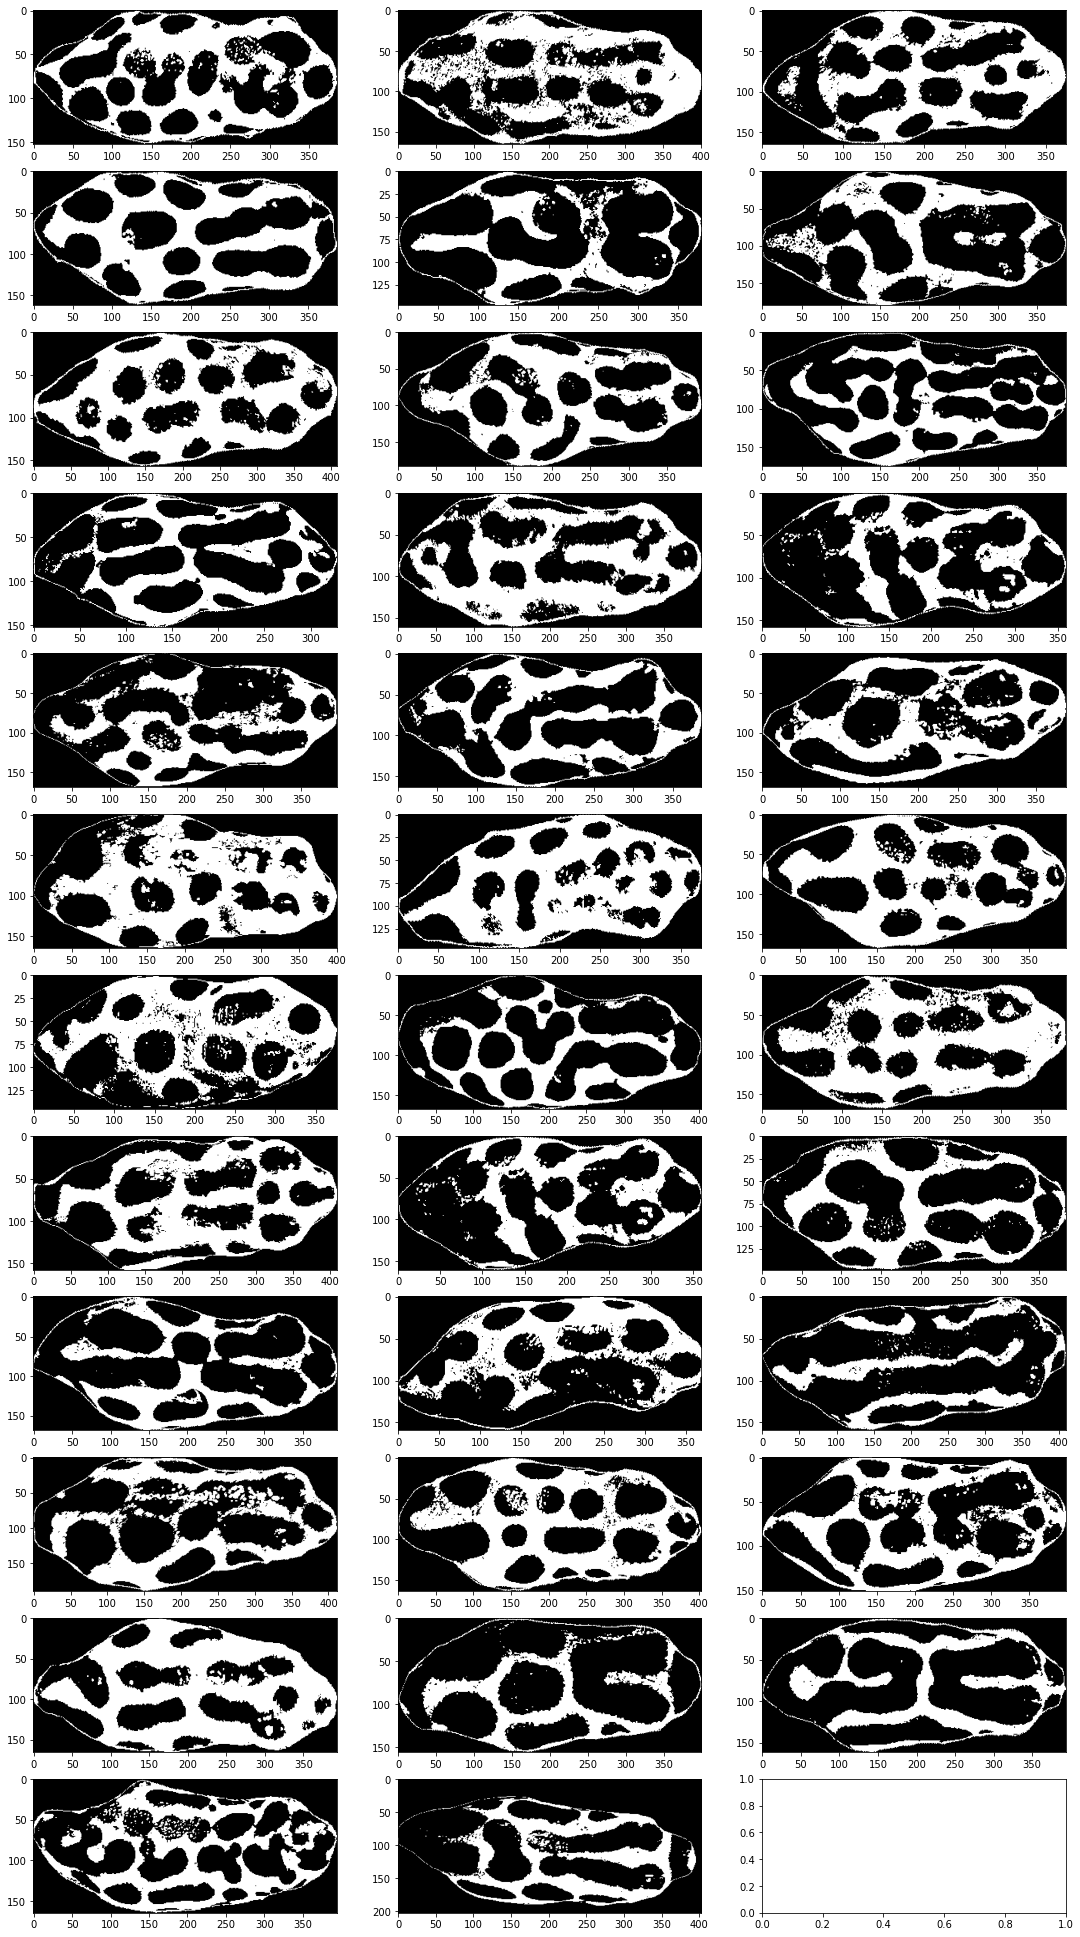

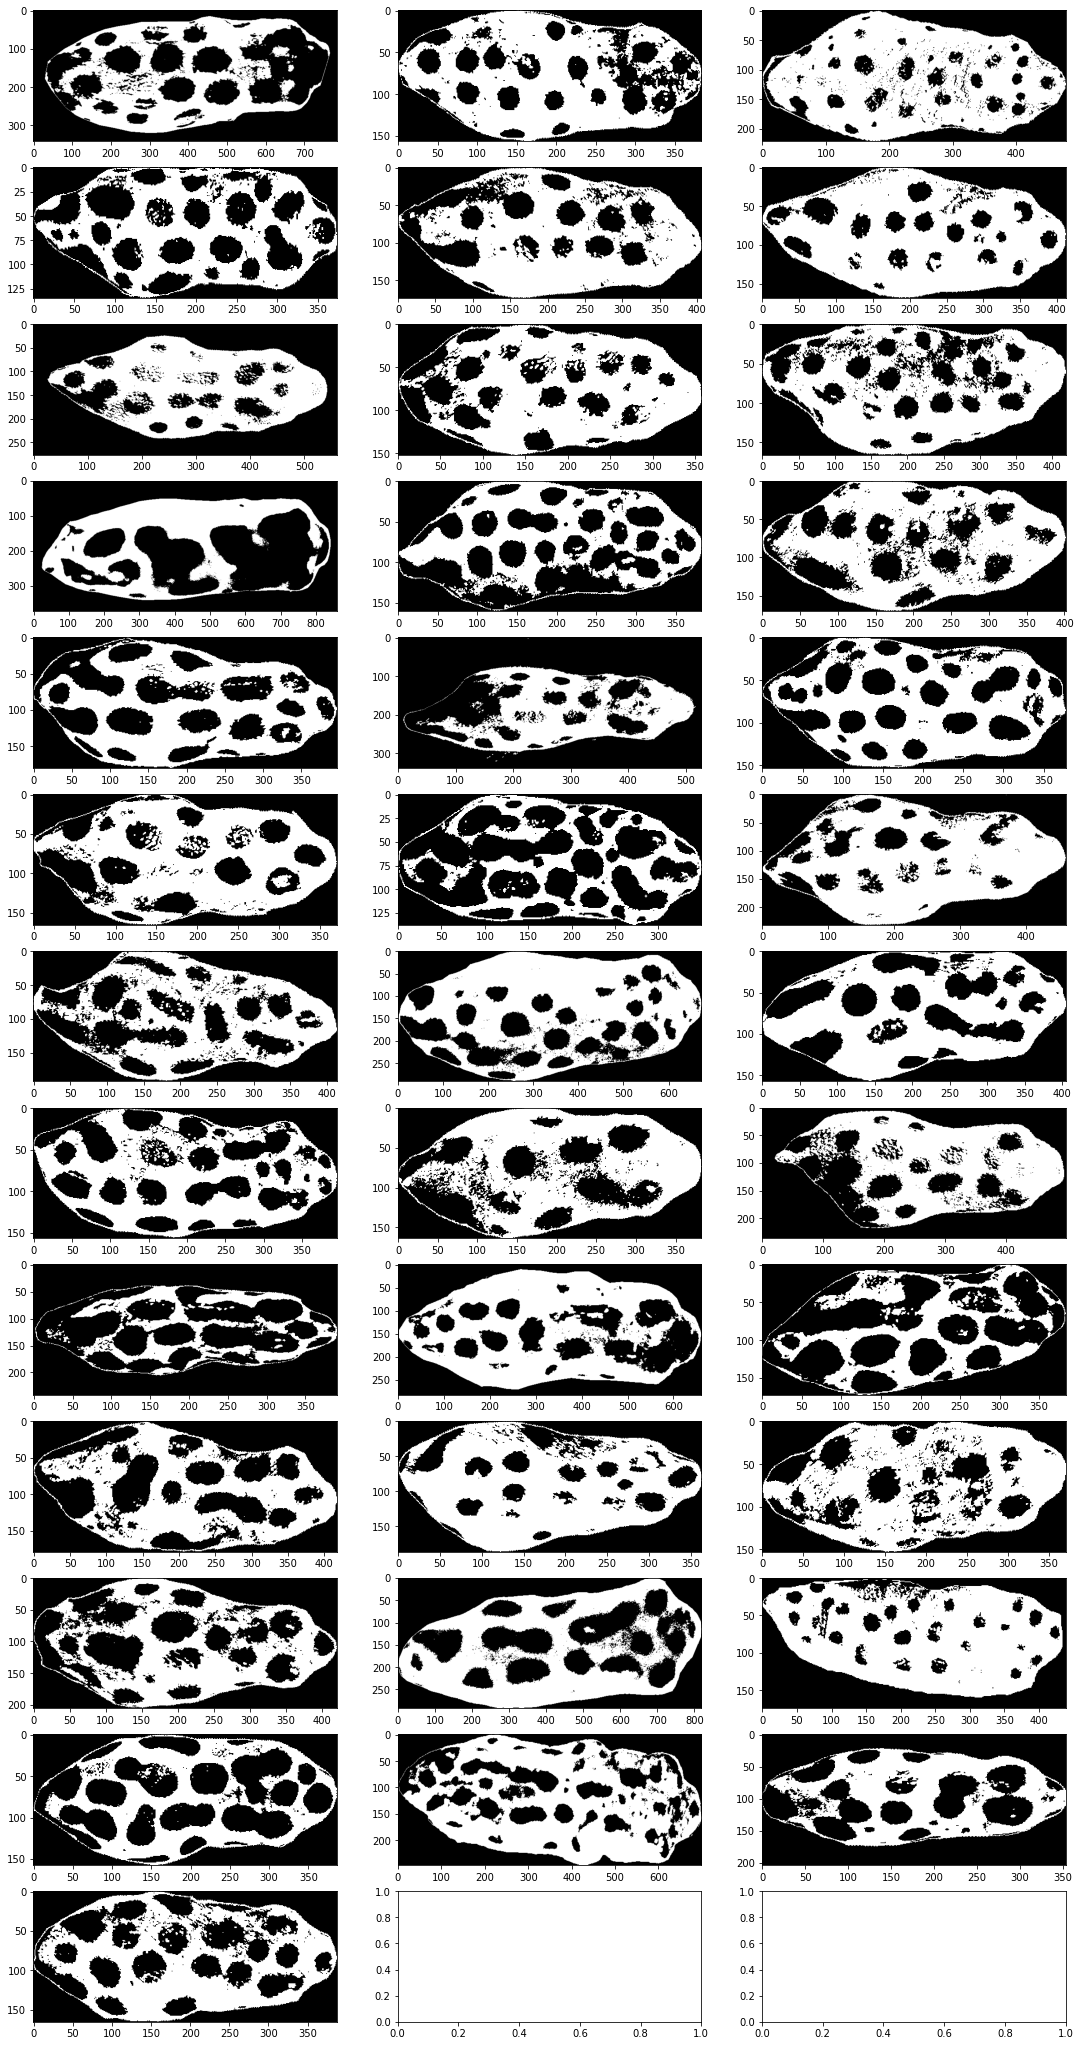

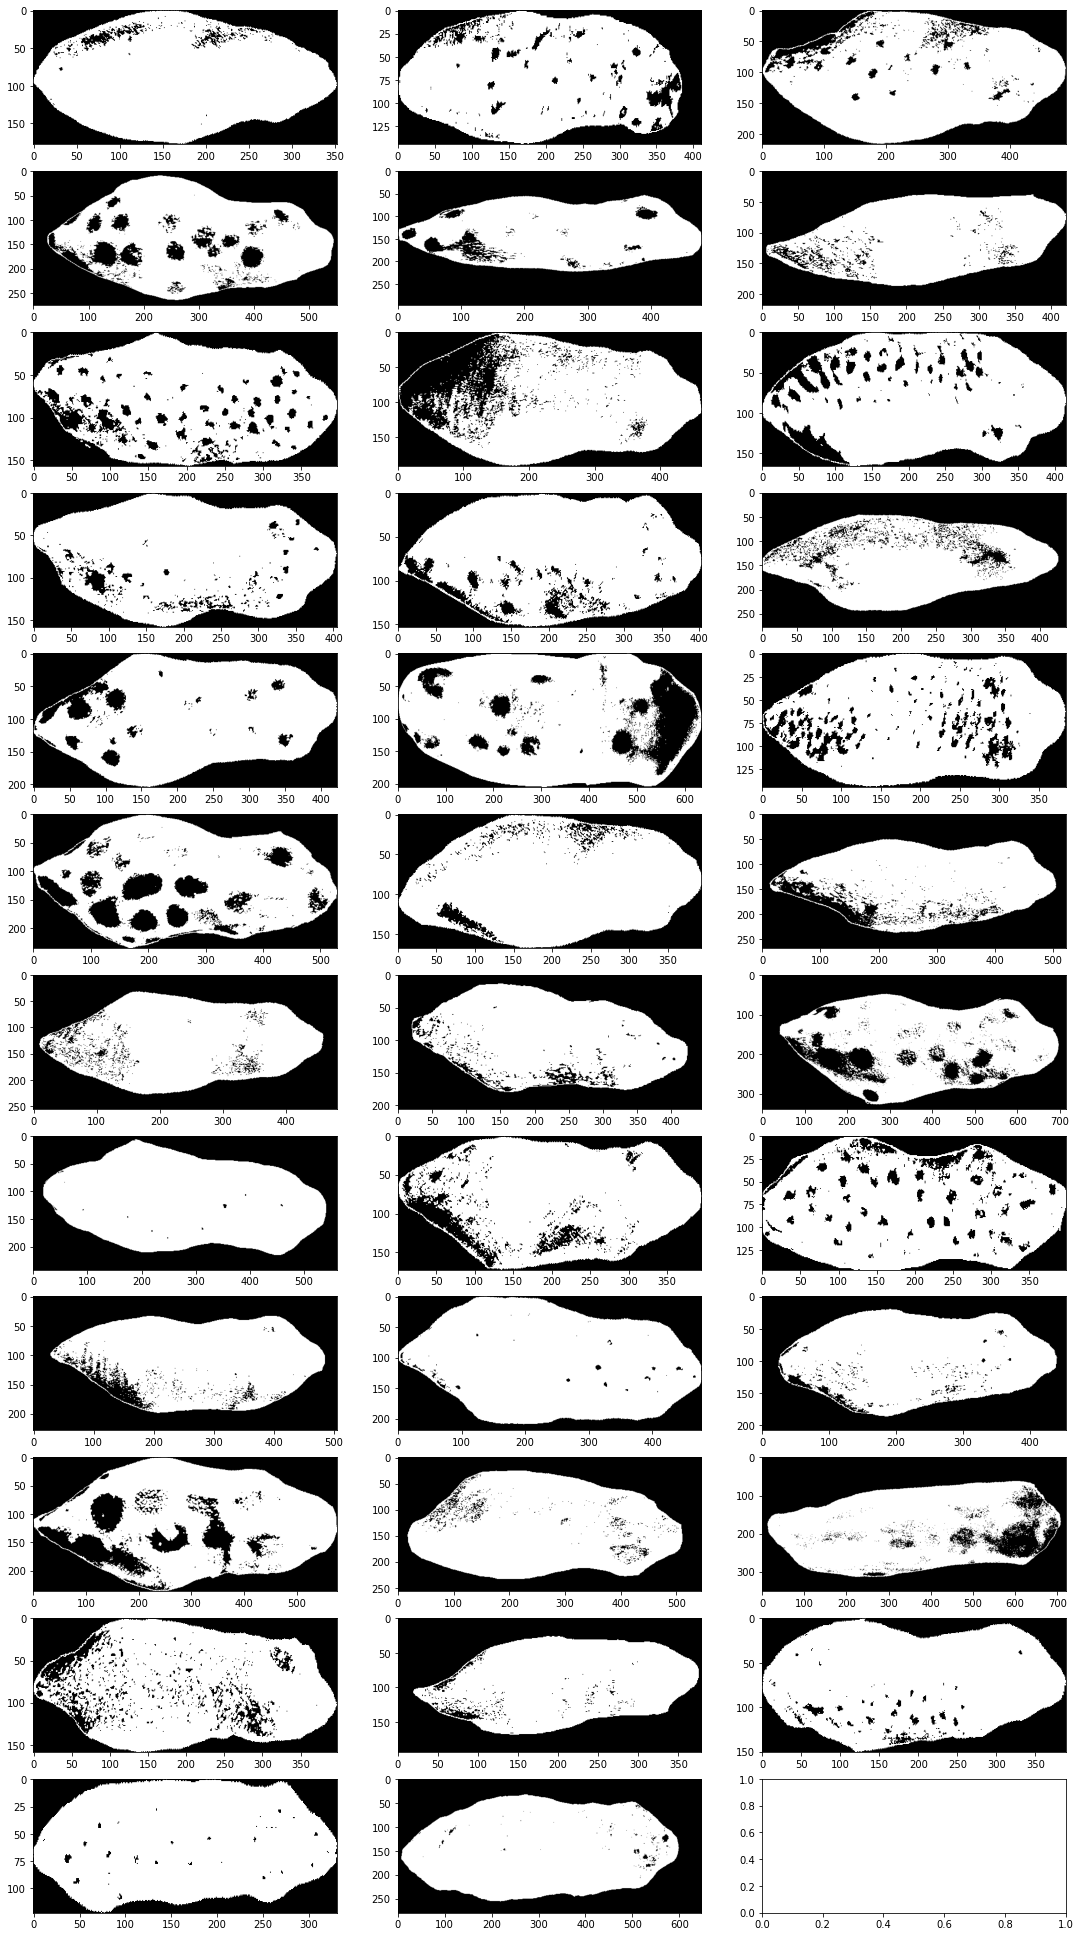

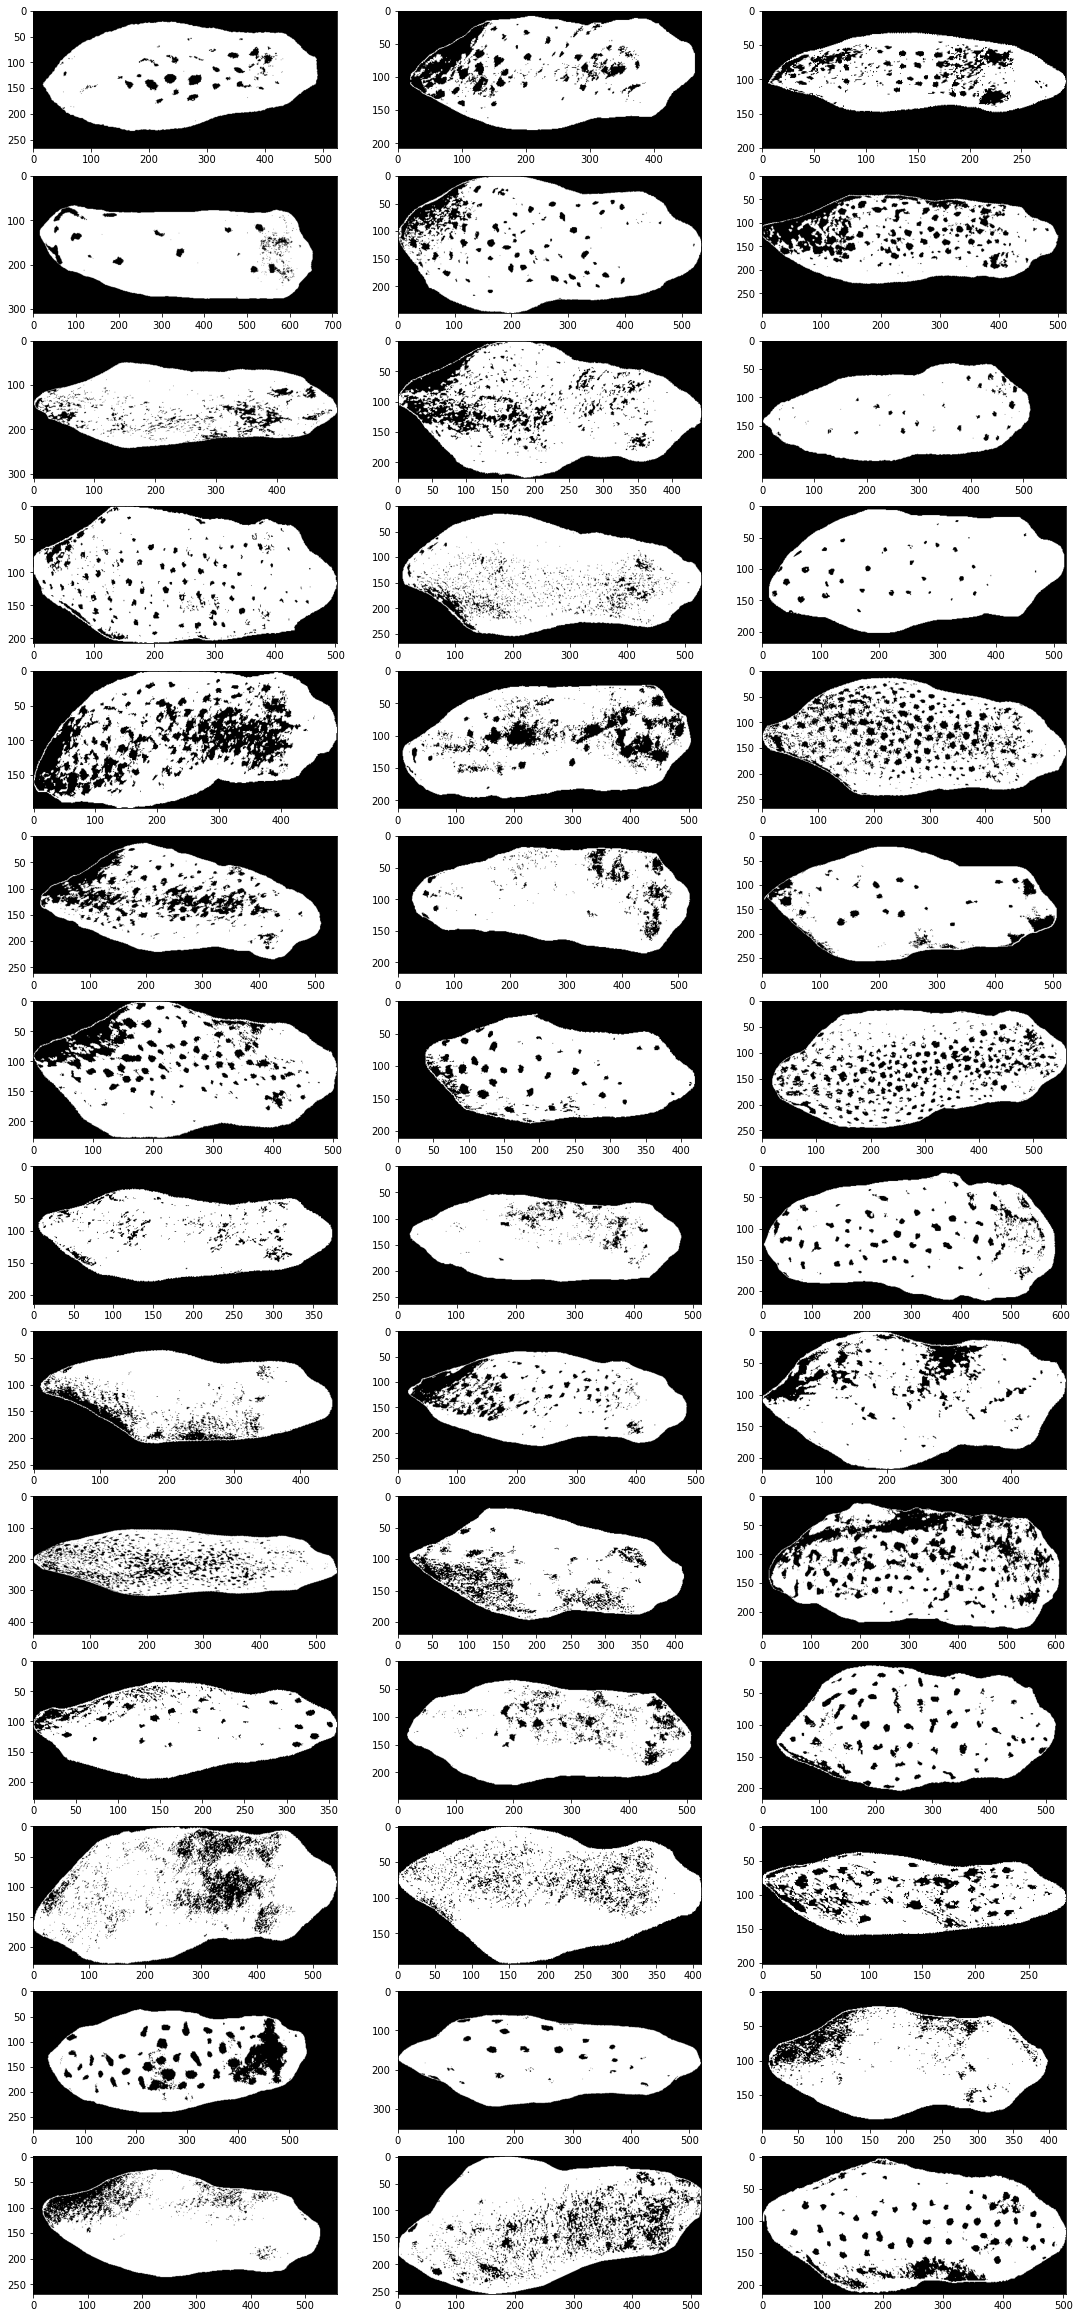

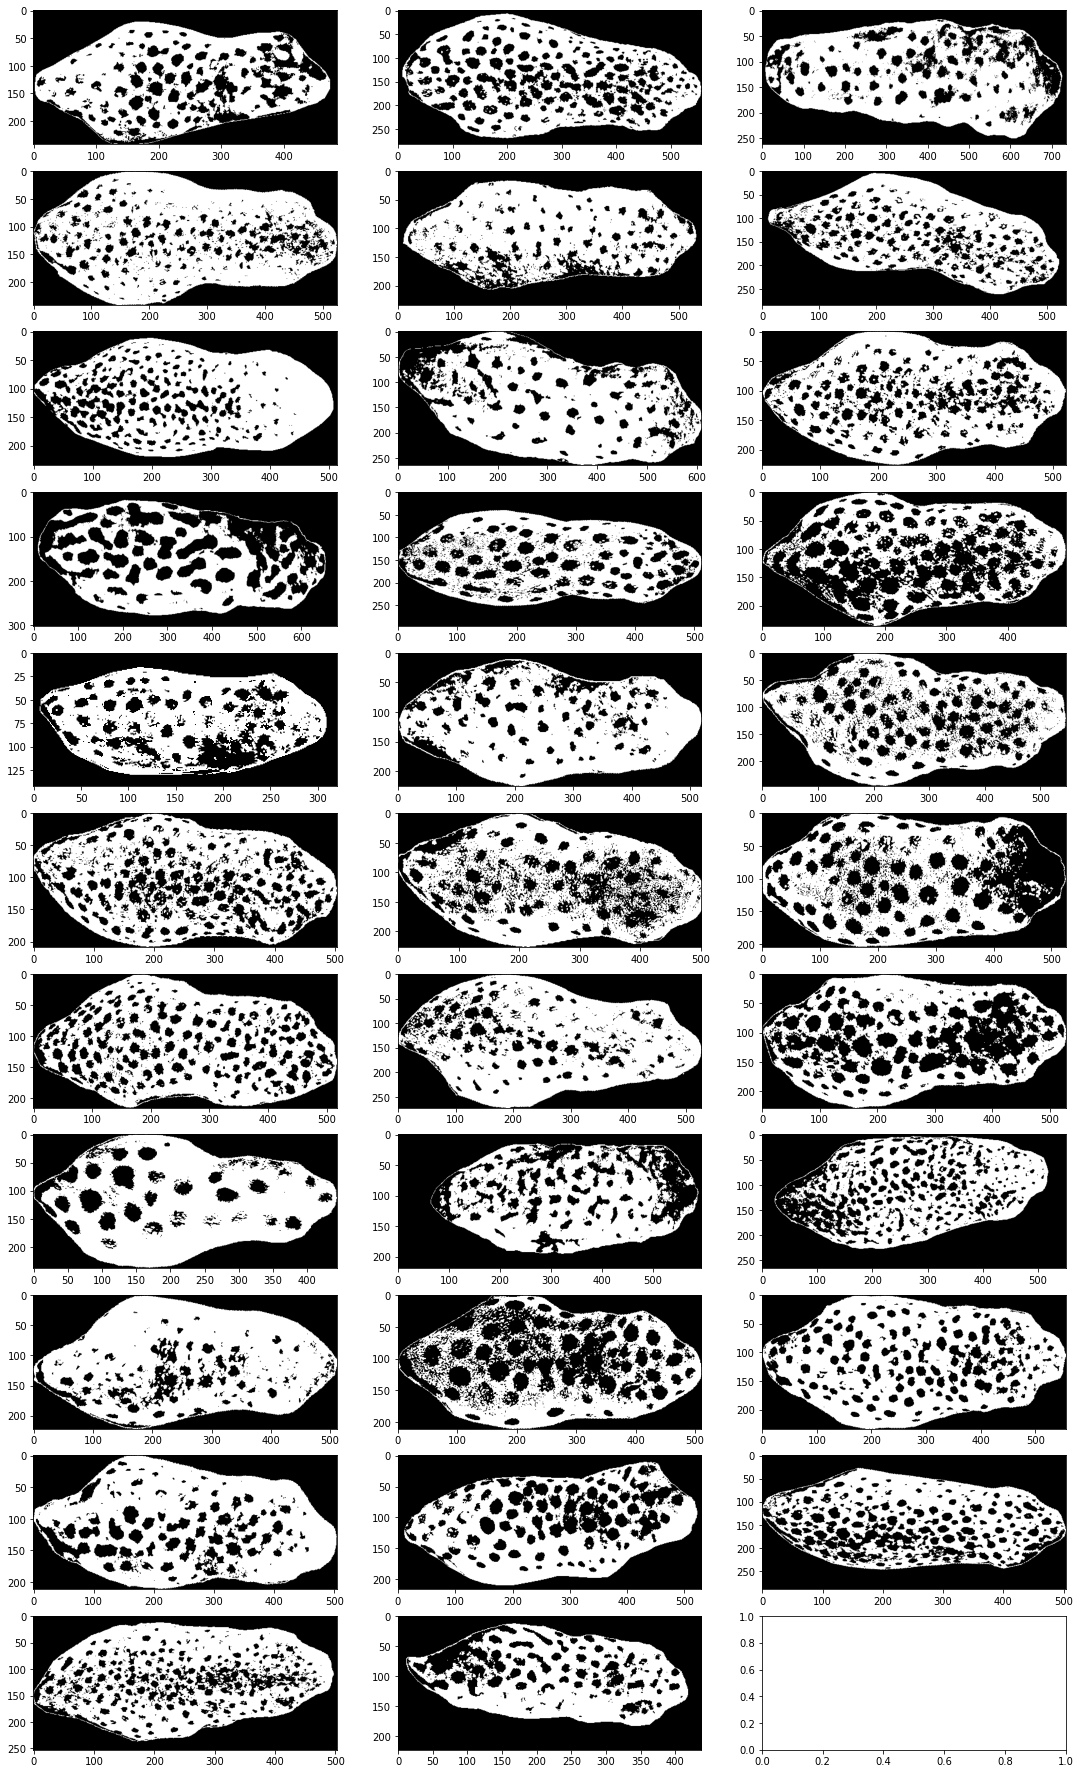

In [81]:
for i in groups:
    plotGroup(i,"binaryGlare_k6_allPops",groups)

## Write it down

In [138]:
classes=pd.DataFrame(groups.items(), columns=['vgg16_k6', 'frog']).explode('frog').reset_index(drop=True)

In [139]:
classes["sample"]=classes.frog.str.rsplit("_",2,expand=True)[0]
classes

vgg16_k6                   frog sample
0           5  TB34_binary_glare.png   TB34
1           5  HP11_binary_glare.png   HP11
2           5  TB20_binary_glare.png   TB20
3           5  TB35_binary_glare.png   TB35
4           5  TB10_binary_glare.png   TB10
..        ...                    ...    ...
188         2  PP22_binary_glare.png   PP22
189         2  PP03_binary_glare.png   PP03
190         2  PP17_binary_glare.png   PP17
191         2  PP29_binary_glare.png   PP29
192         2  SC05_binary_glare.png   SC05

[193 rows x 3 columns]

In [169]:
classes.groupby(classes["sample"].str[:2]).count()

vgg16_k6  frog  sample
sample                        
CL            15    15      15
CM            63    63      63
HP            28    28      28
PP            31    31      31
SC            22    22      22
TB            34    34      34

In [140]:
'''
k=5
2->3
3->4
4->2


k=6
1->5
4->1
5->4



k=6, 193 individuals
5->0
4->5
3->1
2->3
1->4
0->2
'''

classes["vgg16_k6"].replace([5,4,3,2,1,0], [0,5,1,3,4,2],inplace=True)


In [141]:
PCS=pd.DataFrame(x,columns=["PC"+str(i+1) for i in range(100)])
PCS["frog"]=filenames
subsetPC=PCS[["frog","PC1","PC2"]]
classesPC=pd.merge(subsetPC,classes,on="frog",how="right")
classesPC.head()

frog        PC1        PC2  vgg16_k6 sample
0  TB34_binary_glare.png  26.144369 -26.567638         0   TB34
1  HP11_binary_glare.png   4.208629 -27.403635         0   HP11
2  TB20_binary_glare.png  19.930546 -27.677265         0   TB20
3  TB35_binary_glare.png   7.903657 -26.322672         0   TB35
4  TB10_binary_glare.png  15.938560 -25.194841         0   TB10

In [148]:
meta=pd.read_table("/Users/dianaaguilar/Documents/GitHub/frogFun/outputFiles/blackprop.tsv")
meta["sample"]=meta.bam.str.rsplit("_",2,expand=True)[0]
meta.head()

pop              bam  mom  dad  sex  class1        B1    S1U  S1V    S1B  \
0  AG   AG01_S94.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
1  AG  AG02_S231.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
2  AG  AG03_S230.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
3  AG  AG04_S188.r.bam    0    0    1      -9  1048.452  0.166  0.2  0.283   
4  AG  AG05_S241.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   

     S1G   S1Y    S1R  blackproportion sample  
0  0.257  0.21  0.302             -9.0   AG01  
1  0.257  0.21  0.302             -9.0   AG02  
2  0.257  0.21  0.302             -9.0   AG03  
3  0.257  0.21  0.302             -9.0   AG04  
4  0.257  0.21  0.302             -9.0   AG05

In [149]:
together=pd.merge(meta,classesPC,on="sample",how="left")
together.head()

pop              bam  mom  dad  sex  class1        B1    S1U  S1V    S1B  \
0  AG   AG01_S94.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
1  AG  AG02_S231.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
2  AG  AG03_S230.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
3  AG  AG04_S188.r.bam    0    0    1      -9  1048.452  0.166  0.2  0.283   
4  AG  AG05_S241.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   

     S1G   S1Y    S1R  blackproportion sample frog  PC1  PC2  vgg16_k6  
0  0.257  0.21  0.302             -9.0   AG01  NaN  NaN  NaN       NaN  
1  0.257  0.21  0.302             -9.0   AG02  NaN  NaN  NaN       NaN  
2  0.257  0.21  0.302             -9.0   AG03  NaN  NaN  NaN       NaN  
3  0.257  0.21  0.302             -9.0   AG04  NaN  NaN  NaN       NaN  
4  0.257  0.21  0.302             -9.0   AG05  NaN  NaN  NaN       NaN

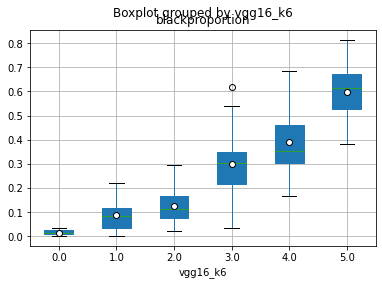

In [151]:
outpath="/Users/dianaaguilar/Documents/GitHub/frogFun/outputFiles/"
together.boxplot(column=["blackproportion"],by="vgg16_k6",showmeans=True,
                  return_type='dict',patch_artist = True,
                  meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})


plt.savefig(outpath+"ClassGlarek6vsBlackproportion.png")

In [152]:
#sex ('1' = male, '2' = female, '0' = unknown)
together["sexgwas"]=together["sex"].replace([0,1,2], [-9,1,2])

In [153]:
together=together[["pop","bam","mom","dad","sex","class1","B1",\
                   "S1U","S1V","S1B","S1G","S1Y","S1R","blackproportion","vgg16_k6","PC1","PC2","sexgwas"]]
together.to_csv(outpath+"binaryglarek6_PCs.tsv",sep="\t",index=False,na_rep=-9)

class1    {'whiskers': [Line2D(_child1), Line2D(_child2)...
dtype: object

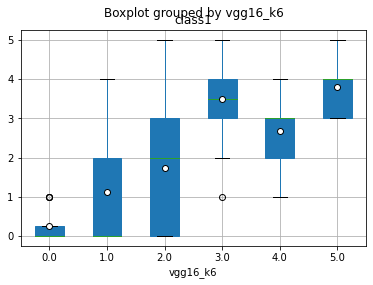

In [154]:
together.boxplot(column=["class1"],by="vgg16_k6",showmeans=True,
                  return_type='dict',patch_artist = True,
                  meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})


#plt.savefig(outpath+"ClassGlarek6vsClass1.png")

B1    {'whiskers': [Line2D(_child1), Line2D(_child2)...
dtype: object

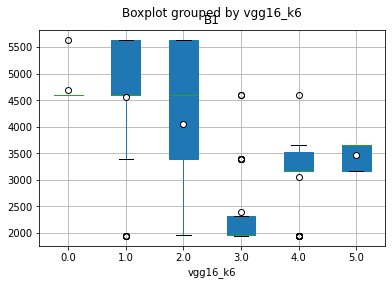

In [156]:
together.boxplot(column=["B1"],by="vgg16_k6",showmeans=True,
                  return_type='dict',patch_artist = True,
                  meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})